In [12]:
from IPython.display import Image
import pandas as pd
import graphviz as gv
from pprint import pprint
import requests
import json
from functools import reduce

# Orange Team Workflow II TIDBIT 
## Fanconi Anemia

## Background
Background Fanconi anemia is a rare genetic disease featuring characteristic developmental abnormalities, a progressive pancytopenia, genomic instability, and predisposition to cancer [1, 2]. The FA pathway contains a multiprotein core complex, including at least twelve proteins that are required for the monoubiquitylation of the FANCD2/FANCI protein complex and for other functions that are not well understood [3–6]. The core complex includes the Fanconi proteins FANCA, FANCB, FANCC, FANCE, FANCF, FANCG, FANCL, and FANCM. At least five additional proteins are associated with the FA core complex, including FAAP100, FAAP24, FAAP20, and the histone fold dimer MHF1/MHF2 [1, 4, 7–10]. The core complex proteins function together as an E3 ubiquitin ligase assembly to monoubiquitylate the heterodimeric FANCI/FANCD2 (ID) complex. The monoubiquitylation of FANCD2 is a surrogate marker for the function of the FA pathway [11]. USP1 and its binding partner UAF1 regulate the deubiquitination of FANCD2 [12]. The breast cancer susceptibility and Fanconi proteins FANCD1/BRCA2, the partner of BRCA2 (PALB2/FANCN), a helicase associated with BRCA1 (FANCJ/BACH1), and several newly identified components including FAN1, FANCO/RAD51C, and FANCP/SLX4 [13–17] participate in the pathway to respond to and repair DNA damage. (needs update with new refs)

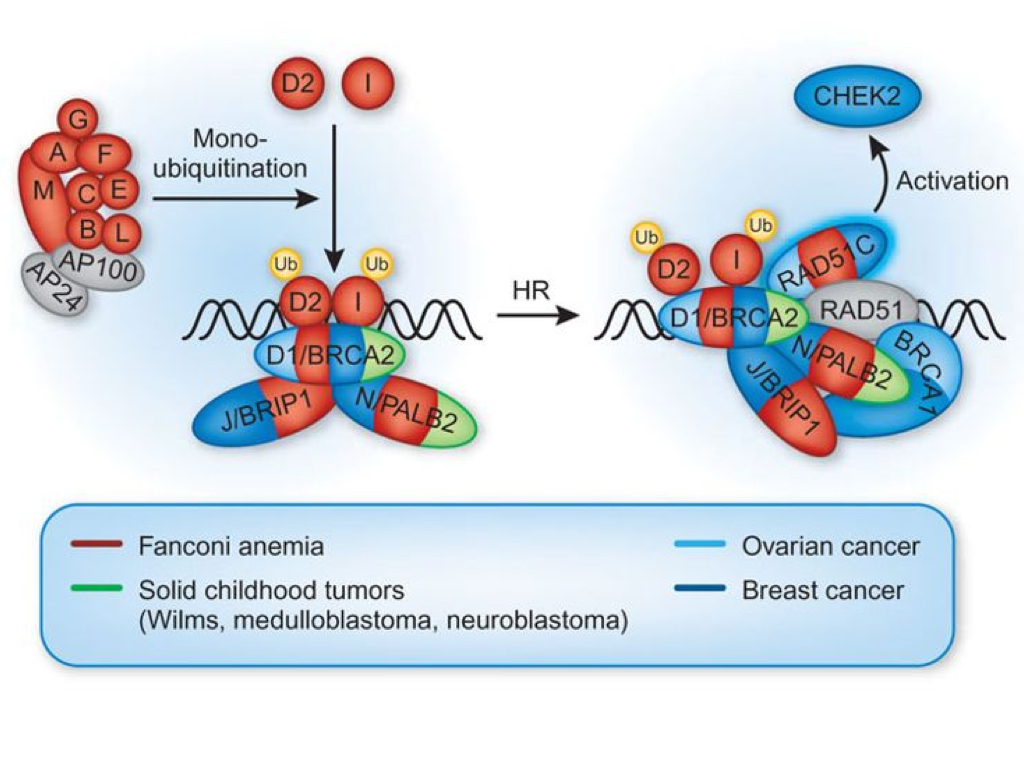

In [2]:
Image('Figures/Figures.005.jpeg')

Levy-Lahad, Nature Genetics, 2010

## Candidate drug target discovery
An important area of focus in any rare disease research is the investigation of candidate drug targets.  One means of identifying novel genes for further experimentation is through identifying candidate genes through analysis based on curated and structured data attributes. These attributes could be functions, phenotypes, interactions, co-expression results, etc.  The distinction is that this is not primary data but data that has been published, then curated in structured databases as knowledge in a machine readable format.  The inderect connections that come from this data modeling are what drive these types of analysis.



## The existing way
Traditionally, candidates are identied by querying pubmed, reading relevant literature, and leveraging domain expertise to identify and construct new ideas from the bits of knowledge extracted from the free text. Those ideas are then tested in the laboratory and iterated upon. On the other end of the spectrum, experimental high throughput methods generate lists of candidates that are so massive they are difficult to prioritize. **There has to be a better way!**

## The Translator way
The following is an example analysis that leverages curated knowledge (extracted and structured by professional curators with expertise in the domain) that has been semantically modeled to support machine readability in advanced querying and semantic similarity search algorithms.  Essentially, genes are identified as similar based  not only on the attributes that have been assigned to those genes (e.g. functions, phenotypes, etc) but also a higher level of understanding of how those attributes relate to one another.  For example, while 'interstrand cross-link repair' and 'DNA repair' are not identical terms, 'interstrand cross-link repair' is a type of 'DNA repair'. The similarity algorithm takes the structure of the Gene Ontology (a structured vocabulary that describes functions and how they relate to each other) into consideration when calculating similarity.

## Module1 Gene Based Analysis
This workflow module is a collection of algorhtihms designed to take a set of genes associated with a disease, and find candidate genes for further research based on a variety of aspects of relatedness.  

The initial step in this analysis is to provide a disease of interest as the input.  The entire system relies on stable identifiers from structured vocabularies such as the Monarch Disease Ontology (MONDO), rather than simply providing the text name of a disease.

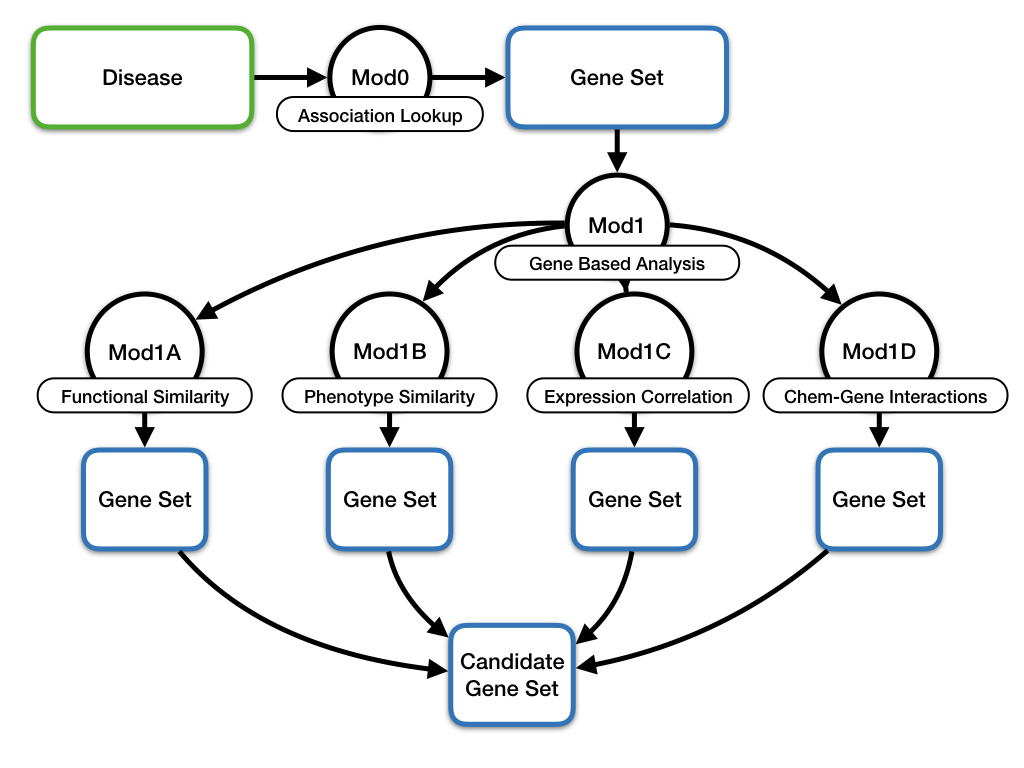

In [3]:
Image('Figures/Figures.013.jpeg')

Regardless of the submodule chosen, as mentioned, the initial input is a disease identifier.  For this example below, Fanconi Anemia is the input disease.  The input itself is the MONDO identifier `MONDO:0019391`

# Module 0 Disease to Gene lookup
## This module retrieves disease-gene associations from Monarchinitiative.org.

## Disease to gene set
Providing the disease identifier to the first submodule Module 0, will return a set of genes with associations to the Fanconi Anemia. The content of the return gene set includes the gene name, source of the association claim, and a list of HUGO Gene Nomenclature Committee (HGNC) database identifiers e.g. HGNC:2176, ... 

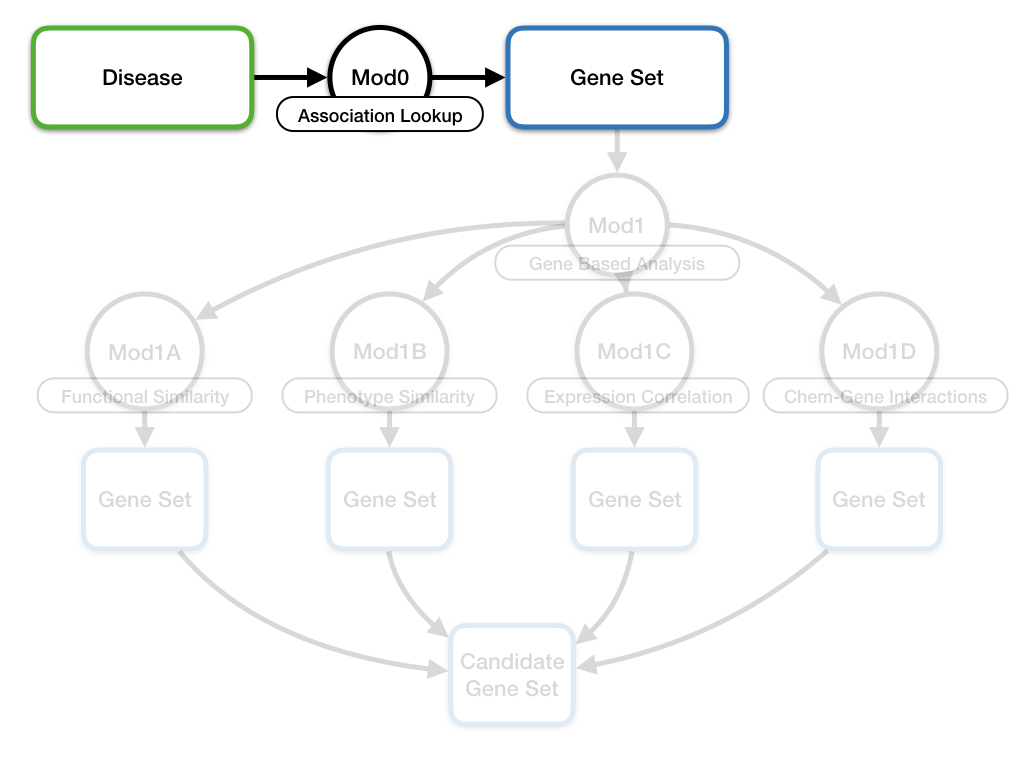

In [4]:
Image('Figures/Figures.017.jpeg')

In [5]:
from Modules.Mod0_lookups import LookUp

# workflow input is a disease identifier
lu = LookUp()

input_disease = 'MONDO:0019391' # Fanconi anemia  
input_object = {
    'input': input_disease,
    'parameters': {
        'taxon': 'human',
        'threshold': None,
    },
}

lu.load_input_object(input_object=input_object)
input_object = lu.input_object

Mod O DiseaseGeneLookup metadata:
{'data_type': 'disease',
 'input_type': {'complexity': 'single', 'id_type': ['MONDO', 'DO', 'OMIM']},
 'limit': None,
 'output_type': {'complexity': 'set', 'id_type': 'HGNC'},
 'predicate': 'blm:gene associated with condition',
 'source': 'Monarch Biolink',
 'taxon': 'human'}
{'description': 'Fanconi anemia (FA) is a hereditary DNA repair disorder '
                'characterized by progressive pancytopenia with bone marrow '
                'failure, variable congenital malformations and predisposition '
                'to develop hematological or solid tumors.',
 'id': 'MONDO:0019391',
 'label': 'Fanconi anemia'}


In [18]:
# get genes associated with disease from Biolink
disease_associated_genes = lu.disease_geneset_lookup()
disease_associated_genes = disease_associated_genes[disease_associated_genes['sources'] != 'ctd'].sort_values('hit_symbol').reset_index()
# create list of gene curies for downstream module input
input_curie_set = disease_associated_genes[['hit_id', 'hit_symbol']].drop_duplicates().to_dict(orient='records')
# load to json file for future use
with open('input_curie_set.json', 'w') as ics:
    json.dump(input_curie_set, ics)
# # show the 
disease_associated_genes['modules'] = 'Mod0'
disease_associated_genes

,index,input_id,input_symbol,hit_id,hit_symbol,relation,sources,modules
0,0,MONDO:0019391,Fanconi anemia,HGNC:1100,BRCA1,pathogenic_for_condition,clinvar,Mod0
1,1,MONDO:0019391,Fanconi anemia,HGNC:1101,BRCA2,has phenotype,orphane,Mod0
2,2,MONDO:0019391,Fanconi anemia,HGNC:1101,BRCA2,is marker for,"omim, ctd, orphane, clinvar",Mod0
3,6,MONDO:0019391,Fanconi anemia,HGNC:20473,BRIP1,is marker for,"ctd, orphane",Mod0
4,7,MONDO:0019391,Fanconi anemia,HGNC:20473,BRIP1,likely_pathogenic_for_condition,"omim, ctd, clinvar",Mod0
5,21,MONDO:0019391,Fanconi anemia,HGNC:3436,ERCC4,is marker for,"ctd, omim, clinvar",Mod0
6,20,MONDO:0019391,Fanconi anemia,HGNC:3436,ERCC4,has phenotype,orphane,Mod0
7,23,MONDO:0019391,Fanconi anemia,HGNC:3582,FANCA,pathogenic_for_condition,"ctd, omim, clinvar",Mod0
8,22,MONDO:0019391,Fanconi anemia,HGNC:3582,FANCA,has phenotype,orphane,Mod0
9,25,MONDO:0019391,Fanconi anemia,HGNC:3583,FANCB,pathogenic_for_condition,"omim, ctd, clinvar",Mod0


In [17]:
# has phenotype seems to be a data issue